In [1]:
import scvelo as scv
scv.settings.verbosity = 0
dataset = '../data/Oligo/oligo_lite.h5ad'
label = 'celltype'
exp_metrics = {}

In [2]:
import unitvelo as utv

(Running UniTVelo 0.1.0)
2022-03-29 03:02:33


In [3]:
cluster_edges = [
    ("COPs", "NFOLs"), 
    ("NFOLs", "MFOLs")]

## scVelo stochastic

  0%|          | 0/6253 [00:00<?, ?cells/s]

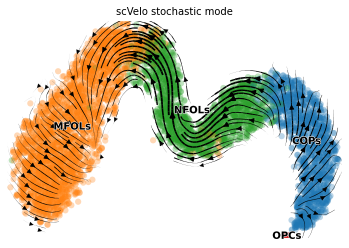

In [4]:
title = 'scVelo stochastic mode'
adata = scv.read(dataset)
adata.uns['datapath'] = dataset
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.velocity(adata, mode='stochastic')

scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=label, title=title)

In [5]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

# Cross-Boundary Direction Correctness (A->B)
{('COPs', 'NFOLs'): 0.3217927533370626, ('NFOLs', 'MFOLs'): 0.37252051617082893}
Total Mean: 0.34715663475394576
# In-cluster Coherence
{'COPs': 0.908653, 'MFOLs': 0.8766088, 'NFOLs': 0.8247232, 'OPCs': 0.97460294}
Total Mean: 0.8961470127105713


## scVelo dynamic

  0%|          | 0/762 [00:00<?, ?gene/s]

  0%|          | 0/6253 [00:00<?, ?cells/s]

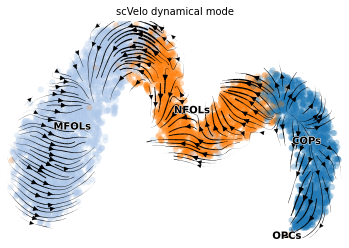

In [5]:
title = 'scVelo dynamical mode'
adata = scv.read(dataset)
adata.uns['datapath'] = dataset
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.recover_dynamics(adata, n_jobs=20)
scv.tl.velocity(adata, mode='dynamical')

scv.tl.velocity_graph(adata)
adata.uns['celltype_colors'] = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']
scv.pl.velocity_embedding_stream(adata, color=label, title=title)

In [7]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

# Cross-Boundary Direction Correctness (A->B)
{('COPs', 'NFOLs'): 0.006073898737481777, ('NFOLs', 'MFOLs'): -0.03040813581616349}
Total Mean: -0.012167118539340856
# In-cluster Coherence
{'COPs': 0.9886154398893292, 'MFOLs': 0.7908328872896636, 'NFOLs': 0.8057366905852176, 'OPCs': 0.9991677538178638}
Total Mean: 0.8960881928955184


## UniTVelo

In [8]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = False
velo_config.IROOT = None
velo_config.FIT_OPTION = '1'

-------> Model Configuration Settings <-------

 GPU: 2	FIG_DIR: ./figures/	BASE_FUNCTION: Gaussian	
 GENERAL: Curve	BASIS: None	N_TOP_GENES: 2000	
 OFFSET_GENES: False	FILTER_CELLS: False	EXAMINE_GENE: False	
 RESCALE_TIME: False	RESCALE_DATA: True	R2_ADJUST: False	
 IROOT: None	NUM_REPEAT: 1	FIT_OPTION: 1	
 DENSITY: SVD	REORDER_CELL: Soft_Reorder	AGGREGATE_T: True	
 ASSIGN_POS_U: False	WIN_SIZE: 50	LEARNING_RATE: 0.01	
 MAX_ITER: 10000	USE_RAW: False	RAW_GENES: False	

---> # of velocity genes used 638
---> # of velocity genes used 638
---> # of velocity genes used 637


  0%|          | 0/10000 [00:00<?, ?it/s]

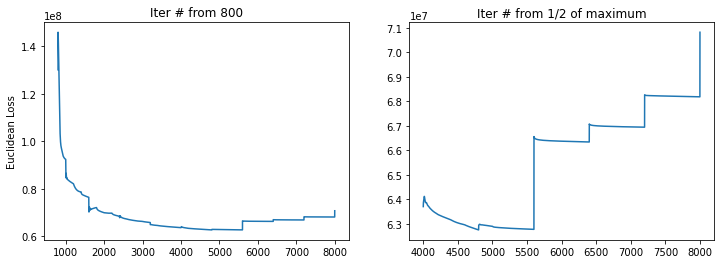

  0%|          | 0/6253 [00:00<?, ?cells/s]

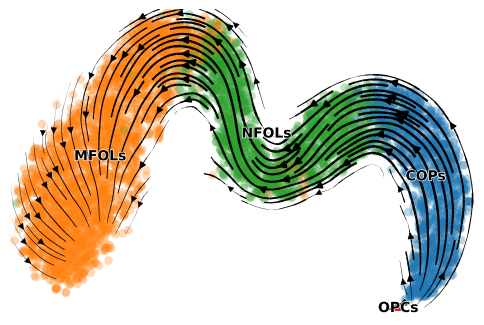

In [9]:
adata = utv.run_model(dataset, label, config_file=velo_config)
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='')

In [10]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

# Cross-Boundary Direction Correctness (A->B)
{('COPs', 'NFOLs'): 0.8179177312376334, ('NFOLs', 'MFOLs'): 0.3992802453211377}
Total Mean: 0.6085989882793856
# In-cluster Coherence
{'COPs': 0.9934387135331175, 'MFOLs': 0.9863923407418005, 'NFOLs': 0.9873910401013626, 'OPCs': 0.9914196786188446}
Total Mean: 0.9896604432487813


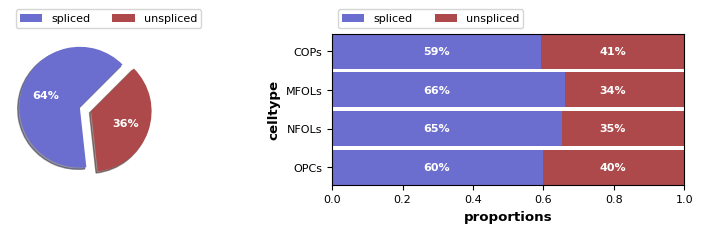

In [11]:
scv.pl.proportions(adata, 'celltype')